# THEORIE

## Machine learning. apprentissage supervise

Definition historique, Arthur Samuel : "Donner a une machine la capacite d'apprendre sans la programmer de facon explicite"

Developper un model mathematique a partir de donnees experimentale.

Il existe 3 techniques :
1. Apprentissage supervise
2. Apprentissage non-supervise
3. Apprentissage par renforcement

## Apprentissage supervise

La machine recoit des donnees caracterisees par des variables x (e.g : couleur, longueur, largeur)et annote d'une variable y (e.g nom de la chose decrite)

- x : Ce sont les features
- y : C'est le label / target variable

La machine doit apprendre a predire y en fonction de x

Pour ce faire :

1. On donne plein de donnees a la machine (dataset)
2. On specifie le type de modele que le machine doit apprendre, en precisant les hyper parametres du model (modele lineraire, polynomial, arbre de decision, reseau de neurones, etc.). On precise aussi les hyper parametre du model (e.g : nb. branche entre les couches de neurones ; combien de neurones ; etc. )
3. La machine va alors, via des algorithmes d'optimisation, retourner les parametres du modeles pour obtenir les meilleurs resultats sur le dataset. (Phase d'entrainement)

L'apprentissage supervise permet de resoudre deux types de probleme :
1. les problemes de regression (e.g prix d'un appartement) - y est continue (quantitative)
2. les problemes de classification (e.g email spam/non spam) - y est discrete (qualitative)

# SCIKIT LEARN

La plupart des modeles de statistical learning ont deja ete implementes et chaque modele dispose de sa propre classe. Pour creer un model, il va donc falloir instancier un objet avec la classe correspondante. On parle "d'estimateur" dans scikit learn.

1. __Selection un modele__ (instancier la classe associee, e.g LinearRegression())
2. __Entrainer le model__ "fit(X, y)" (deux tableaux numpy a 2 dimensions (n_features, les colonnes // n_samples les lignes)). Y la target variable est un vecteur de n_sample (a quoi correspondent nos samples)
3. __Evaluer le model__ "score(X, y)"
4. __Utiliser le model__ "predict(X)"

Avec 3 methodes identiques. __Quel que soit le model, l'interface d'utilisation (les methodes) est toujours la meme__

In [ ]:
from sklearn.linear_model import LinearRegression

![Scikit learn, algo cheat sheet](https://scikit-learn.org/stable/_static/ml_map.png)

## Probleme de regression avec Scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)
m = 100 #On va creer 100 echantillons
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m,1)

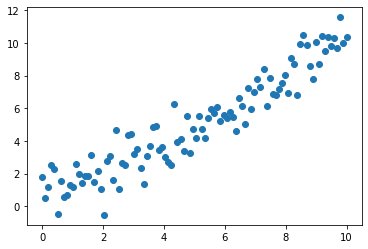

In [5]:
plt.figure()
plt.scatter(X, y)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

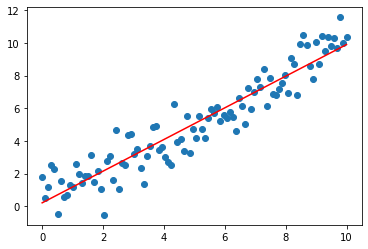

In [10]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y) # Coefficient de determination
predictions = model.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, predictions, color = 'r')
plt.show()

#### Si dataset non lineaire

In [11]:
np.random.seed(0)
m = 100 #On va creer 100 echantillons
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m,1)

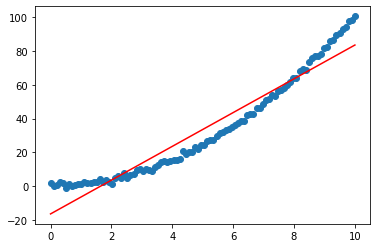

In [12]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y) # Coefficient de determination
predictions = model.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, predictions, color = 'r')
plt.show()

Il faut comprendre que ce n'est pas le model adapte a ce type d'apprentissage, pas que le model n'a pas reussi son apprentissage.

On peut donc choisir un autre model, par exemple :

In [13]:
from sklearn.svm import SVR

/home/maximorose/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


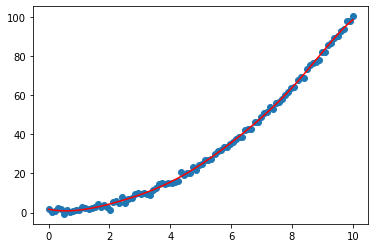

In [14]:
model = SVR(C = 100)
model.fit(X,y)
model.score(X,y) # Coefficient de determination
predictions = model.predict(X)

plt.figure()
plt.scatter(X, y)
plt.plot(X, predictions, color = 'r')
plt.show()

On aurait aussi pu faire du traitement de donner et creer des variables polynomiales (__Feature Engineering__)

## Probleme de classification avec Scikit-learn

In [16]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Nettoyage et categorisation du dataset

In [17]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


Pour resoudre une probleme de classification (e.g savoir si, un passager du titanic, va survivre ou non quand il embarque)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier()
y = titanic['survived']
X = titanic.drop('survived', axis=1)
model.fit(X, y)

KNeighborsClassifier()

In [21]:
model.score(X, y)

0.8319327731092437

In [31]:
def survie(model, pclass = 3, sex = 0, age = 36) :
    x = np.array([pclass, sex, age]).reshape((1, 3)) # Entrer les infos dans l'ordre dans lequel la machine a ete entrainee
    # Penser que notre tableau doit avoir 2 dimensions
    print(model.predict(x))
    print(model.predict_proba(x))
    return 

In [36]:
survie(model=model, pclass=1, sex=0, age=36)

[1]
[[0.4 0.6]]


40% de chances de mourir.
60% de chances d'etre en vie.

In [34]:
survie(model=model, pclass=3, sex=1, age=32)

[0]
[[0.6 0.4]]


Attention quand meme a la pertinence du resultat, car le model n'a que 83% de precisions

# Exercice

Modifier l'hyperparametre n_neighbors (KNeighborsClassifier(n_neighbors=xxx)), pour trouver comment ameliorer les performances de notre model

In [37]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)


titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace = True)

(891, 15)


In [69]:
model = KNeighborsClassifier(n_neighbors=2) # Si parmis les 3 voisins les plus proches de moi, 2 ont survecus et 1 est mort, alors l'algorithme va penser que j'ai aussi survecu
y = titanic['survived']
X = titanic.drop('survived', axis=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=2)

In [70]:
model.score(X, y)

0.8585434173669467

In [71]:
voisin = 1
score = 1
best_voisin = 5
model = KNeighborsClassifier(n_neighbors=voisin) # Si parmis les 3 voisins les plus proches de moi, 2 ont survecus et 1 est mort, alors l'algorithme va penser que j'ai aussi survecu
y = titanic['survived']
X = titanic.drop('survived', axis=1)
model.fit(X, y)
previous_topscore = model.score(X, y)

for i in range(10) :
    model = KNeighborsClassifier(n_neighbors=i+1) 
    model.fit(X, y)
    score = model.score(X, y)
    if score > previous_topscore :
        previous_topscore = score
        best_voisin = i+1

print('Best voisin : ', best_voisin)
print('Previous top score : ', previous_topscore)


Best voisin :  2
Previous top score :  0.8585434173669467


J'ai un petit soucis avec les nombres pairs, si j'ai bien compris le sens de cette fonction.

1. Il faudrait commencer par creer un trainset et un testset puis evaluer
2. Avec Gridsearch, trouver les meilleurs hyperparametres, n_neighbors, metric et weights
3. Est-ce que collecter plus de donnees serait plus utile ?